# TIME SERIES ANALYSIS
#### MSDS 7333 - Quantifying the World 
#### Author:  Mridul Jain, Corey Mathews and Eyob Gebremariam

### Abstract 

This assignment focuses on an indepth time series analysis of a stock market and forcasting using ARIMA model.We will aslo perform backtesting on the given finacial protfolio using Signal frontier Analysis to analyse the lookback time and find the optimal holding that gave the best return.
Time Series (TS) is a series of time stamped data points which are often dependent with each other that gives rise to trends and seasonalities.

##### Keywords:
Time Series, Signal Frontier Analysis, Dickey-Fuller test, ARIMA, AR, MA, Stationary, Seasonality  


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
from dateutil.parser import parse
from collections import defaultdict
import random
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
stock_price = pd.read_csv('C:\Users\Eyob\Desktop\stock_px2.csv', parse_dates=True, index_col='Date')
stock_price.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name=u'Date', length=5472, freq=None)

In [8]:
stock_price = stock_price[stock_price.index > datetime(2006, 1,1)]
print (stock_price.head())
print (stock_price.tail())
print (stock_price.shape)
stock_price.shape

               AA   AAPL     GE    IBM    JNJ   MSFT    PEP      SPX    XOM
Date                                                                       
2006-01-03  26.69  74.75  28.55  74.54  51.94  24.08  51.45  1268.80  51.74
2006-01-04  26.84  74.97  28.51  74.44  52.74  24.19  51.42  1273.46  51.83
2006-01-05  27.06  74.38  28.44  74.94  52.52  24.21  51.12  1273.48  51.57
2006-01-06  26.97  76.30  28.63  77.16  52.76  24.14  51.31  1285.45  52.59
2006-01-09  27.29  76.05  28.56  76.06  53.09  24.09  51.05  1290.15  52.56
               AA    AAPL     GE     IBM    JNJ   MSFT    PEP      SPX    XOM
Date                                                                         
2011-10-10  10.09  388.81  16.14  186.62  64.43  26.94  61.87  1194.89  76.28
2011-10-11  10.30  400.29  16.14  185.00  63.96  27.00  60.95  1195.54  76.27
2011-10-12  10.05  402.19  16.40  186.12  64.33  26.96  62.70  1207.25  77.16
2011-10-13  10.10  408.43  16.22  186.82  64.23  27.18  62.36  1203.66  76.37


(1458, 9)

##### Exploratory Data Analysis

In [9]:
# Create stock daily volume dataframe for each stock.
stock_vol = pd.read_csv('C:\Users\Eyob\Desktop\Volume.csv', parse_dates=True, index_col='Date')
stock_price.index
print (stock_vol.head())
print (stock_vol.tail())
print (stock_vol.shape)

                 AA      AAPL        GE       IBM      JNJ       MSFT  \
Date                                                                    
1990-02-01  2185600   4193200  14457600   6903600  5942400   89193600   
1990-02-02  3103200   4248800  15302400   6064400  4732800   71395200   
1990-02-05  1792800   3653200   9134400   5299200  3950400   59731200   
1990-02-06  2205600   2640000  14389200  10808000  3761600   81964800   
1990-02-07  3592800  11180800  18704400  12057600  5458400  134150400   

                  PEP        SPX      XOM  
Date                                       
1990-02-01  2954400.0  154580000  2916400  
1990-02-02  2424000.0  164400000  4250000  
1990-02-05  2225400.0  130950000  5880800  
1990-02-06  3270000.0  134070000  4750800  
1990-02-07  4332600.0  186710000  4124800  
                   AA      AAPL        GE      IBM      JNJ      MSFT  \
Date                                                                    
2011-10-10   29555500  15769200  5

In [10]:
stock_vol = stock_vol[stock_vol.index > datetime(2006, 1,1)]
stock_vol.shape

(1458, 9)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2006-01-03 to 2011-10-14
Data columns (total 9 columns):
AA      1458 non-null float64
AAPL    1458 non-null float64
GE      1458 non-null float64
IBM     1458 non-null float64
JNJ     1458 non-null float64
MSFT    1458 non-null float64
PEP     1458 non-null float64
SPX     1458 non-null float64
XOM     1458 non-null float64
dtypes: float64(9)
memory usage: 113.9 KB


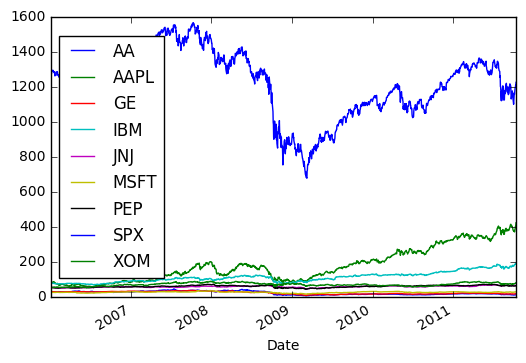

In [11]:
# Plot the last 5 years of closing stock prices
stock_price.info()
stock_price.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2006-01-03 to 2011-10-14
Data columns (total 9 columns):
AA      1458 non-null int64
AAPL    1458 non-null int64
GE      1458 non-null int64
IBM     1458 non-null int64
JNJ     1458 non-null int64
MSFT    1458 non-null int64
PEP     1458 non-null float64
SPX     1458 non-null int64
XOM     1458 non-null int64
dtypes: float64(1), int64(8)
memory usage: 113.9 KB


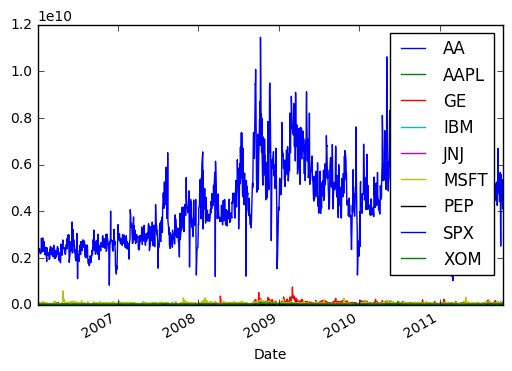

In [12]:
# Plot 5 years of volume transactions
stock_vol.info()
stock_vol.plot()

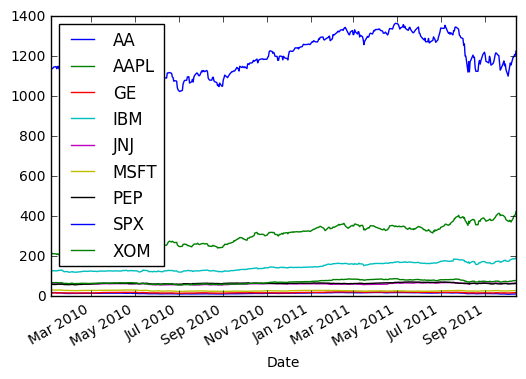

In [13]:
# Plot stock closing prices for the years 2010 and 2011
stock_price.ix['2010':'2011'].plot()

#### Time Series Analysis
We will explore data for mean, variance,trend and seasonality and finally use smothing techniques such as moving average and exponetial. Finally the Dicky-Fuller test will be utilized to determine if there is a stationary condition.


##### Stationary 
A TS is stationary when the folowing criteria are met:
* constant mean
* constant variance
* autocovariance doesn not depend on time

we are going to experiment with only Apple(AAPL) stock and a time range of only 2 years (2010-2011) where the stock price has picked up well.

The following is Dicky-Fuller test method in Python. It is a test of null-hypothesis, where the null hypothesis is that the data is non-stationary. If the test statistic is less than the critical value, we can reject the null hypothesis and say that the series is stationary.  

In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=22)
    rolstd = pd.rolling_std(timeseries, window=22)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

(451L,)


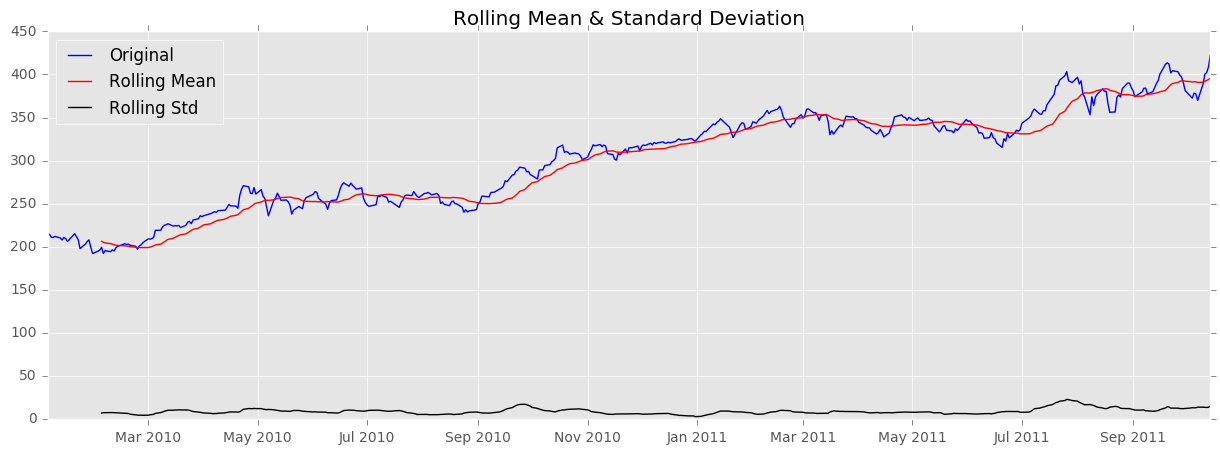

Results of Dickey-Fuller Test:
Test Statistic                  -0.538662
p-value                          0.884249
#Lags Used                       5.000000
Number of Observations Used    445.000000
Critical Value (5%)             -2.868057
Critical Value (1%)             -3.445131
Critical Value (10%)            -2.570241
dtype: float64


In [15]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple = pd.Series(stock_price.AAPL['2010':'2011'])
print (Apple.shape)
test_stationarity(Apple)

There is an up and down trend in the data without any seasonal trend. 

Since we have a p-value of 0.884249 with 95% confidence level, this is not a stationary series. The variation in standard deviation is negligible. 

### Converting  stationary condition.

This is achieved by eliminating seasoanlity and trending

##### Differencing
log transformation is the common way of eliminating variance

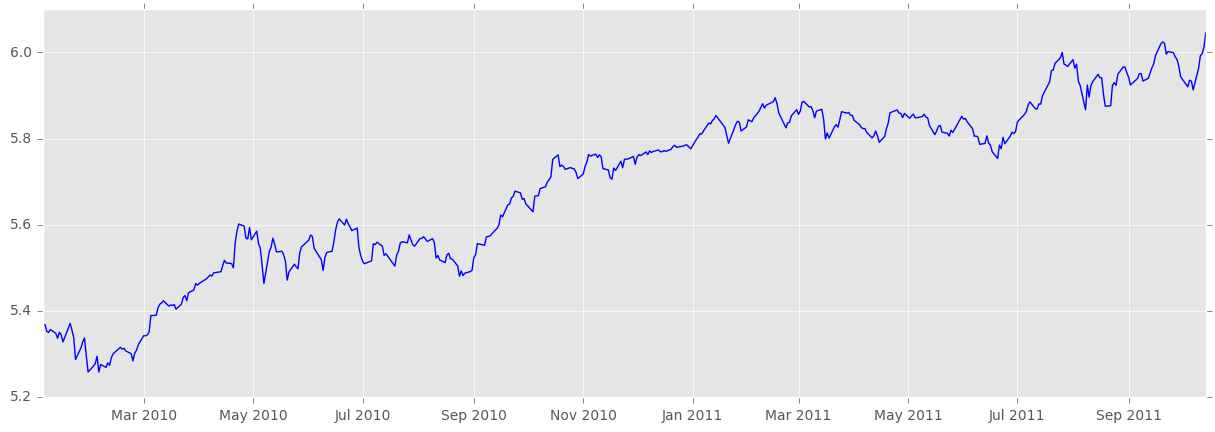

In [16]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_log = np.log(Apple)
plt.plot(Apple_log, color='b')

##### Moving Average
Thus is a way of smoothing the series. We will use 2 weeks (10) business days to find the rolling mean/

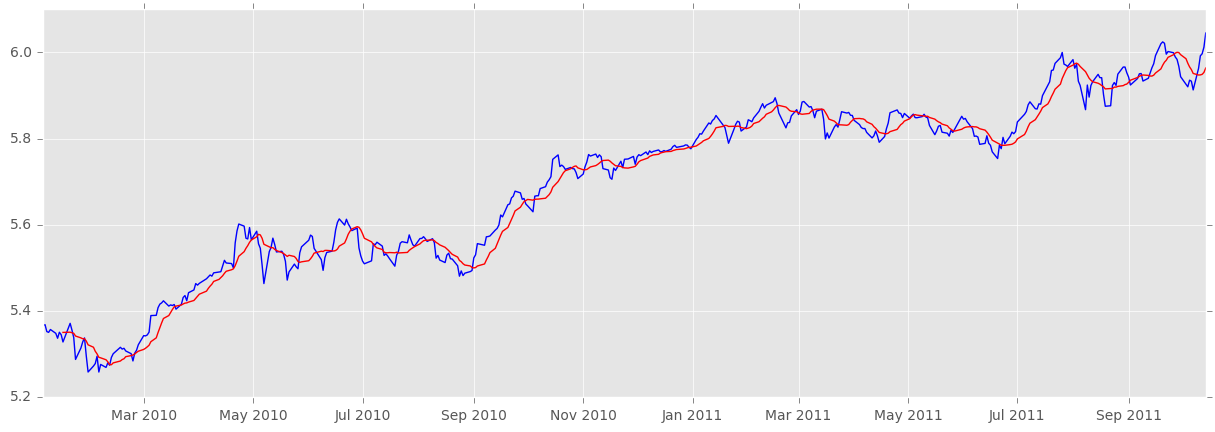

In [17]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
moving_avg = pd.rolling_mean(Apple_log, 10)
plt.plot(Apple_log, color='b')
plt.plot(moving_avg, color='r')

The red plot shows the result of "smoothing" process of the data. On the following Series, notice that the first 14 observations are "NaN", since we need the first 14 values in order to calculate the first moving average value.   

In [18]:
Apple_moving_avg_diff = Apple_log - moving_avg
Apple_moving_avg_diff.head(18)

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12         NaN
2010-01-13         NaN
2010-01-14         NaN
2010-01-15   -0.022243
2010-01-19    0.020565
2010-01-20    0.006296
2010-01-21   -0.009757
2010-01-22   -0.054342
2010-01-25   -0.023500
2010-01-26   -0.007462
2010-01-27    0.001838
2010-01-28   -0.034819
Name: AAPL, dtype: float64

We then drop all "NaN" observations and run Dickey-Fuller stationary test.

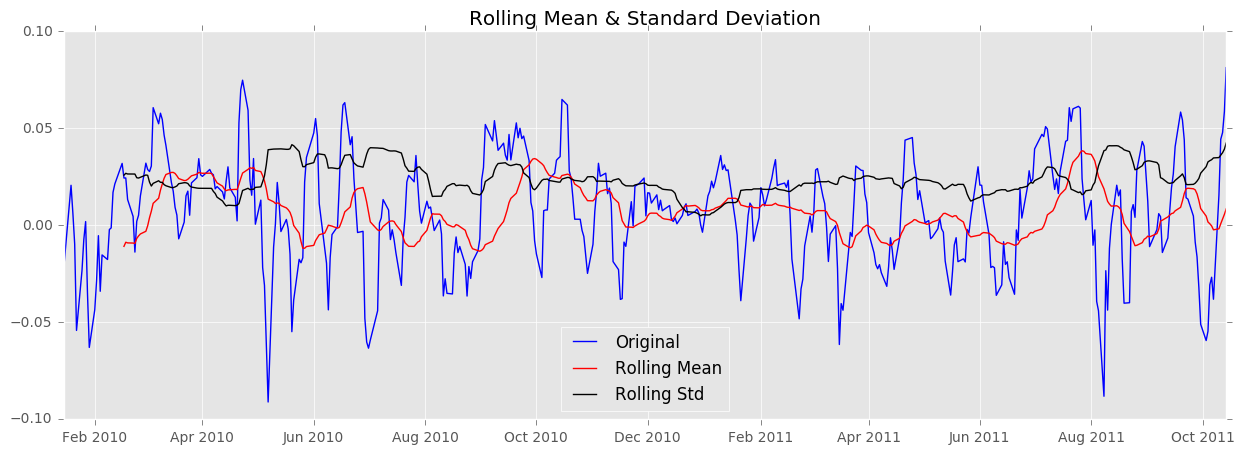

Results of Dickey-Fuller Test:
Test Statistic                -8.050588e+00
p-value                        1.746406e-12
#Lags Used                     4.000000e+00
Number of Observations Used    4.370000e+02
Critical Value (5%)           -2.868177e+00
Critical Value (1%)           -3.445403e+00
Critical Value (10%)          -2.570305e+00
dtype: float64


In [19]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_moving_avg_diff.dropna(inplace=True)
test_stationarity(Apple_moving_avg_diff)

Moving average change series is to stationary.  

### expoential decay smoothing

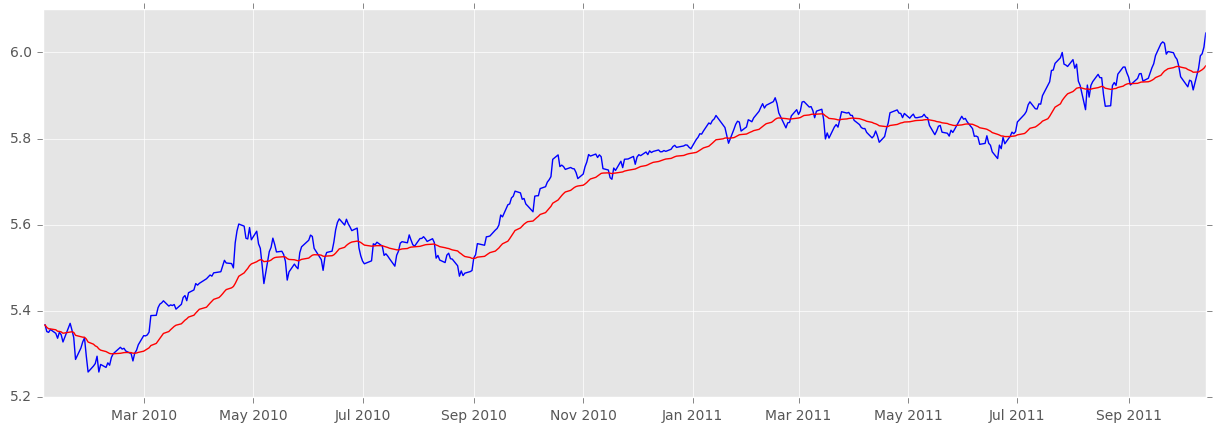

In [20]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
expwighted_avg = pd.ewma(Apple_log, halflife=10)
plt.plot(Apple_log, color='b')
plt.plot(expwighted_avg, color='r')

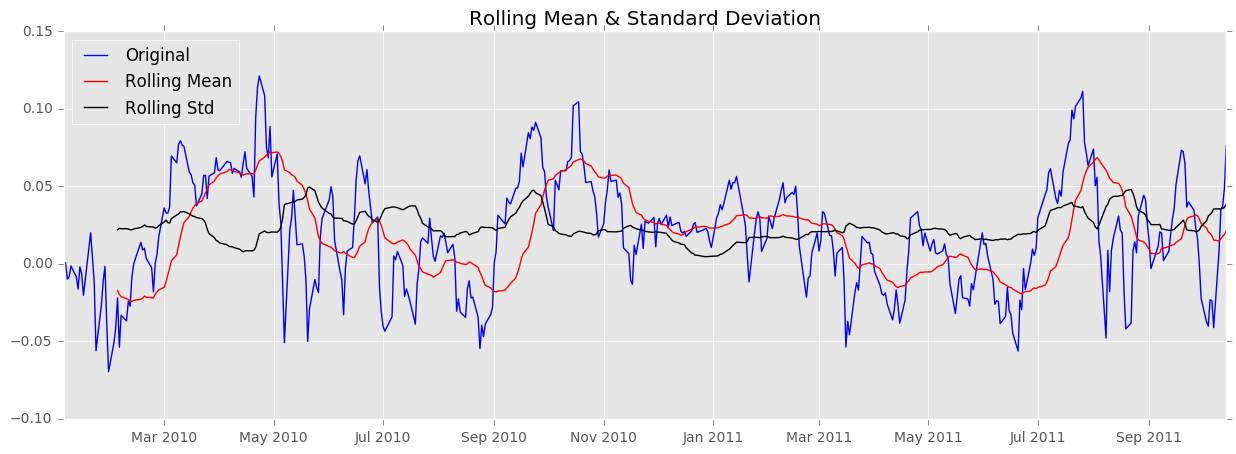

Results of Dickey-Fuller Test:
Test Statistic                  -5.219504
p-value                          0.000008
#Lags Used                       2.000000
Number of Observations Used    448.000000
Critical Value (5%)             -2.868013
Critical Value (1%)             -3.445031
Critical Value (10%)            -2.570218
dtype: float64


In [21]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_log_ewma_diff = Apple_log - expwighted_avg
test_stationarity(Apple_log_ewma_diff)

The exponential smoothing has converted the data to stationary

#### Handling Seasonality using  Differencing and Decomposition.

##### Differencing
log return a means of converting the series to a constant means

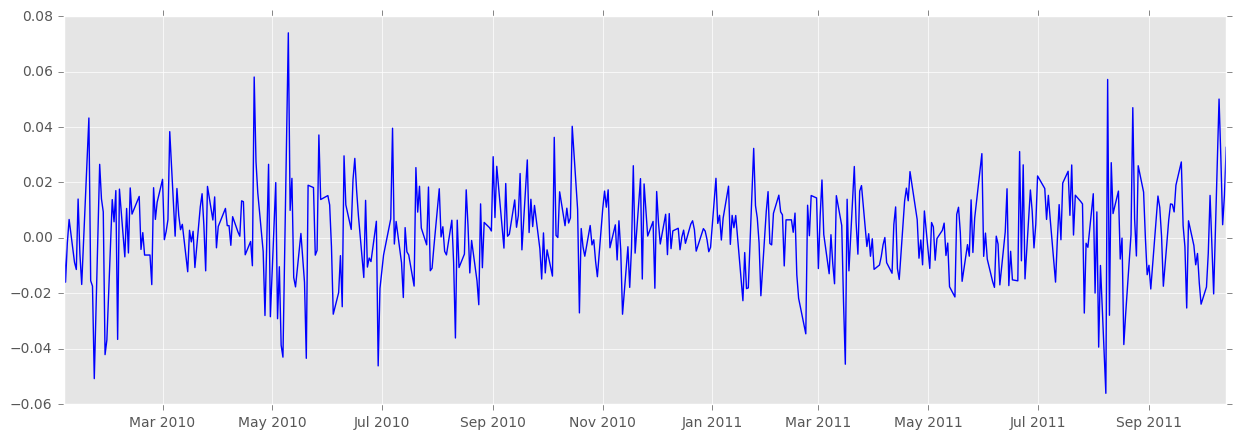

In [22]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_log_diff = Apple_log - Apple_log.shift()
plt.plot(Apple_log_diff, color='b')

In [23]:
Apple_log_diff.head(5)

Date
2010-01-04         NaN
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
Name: AAPL, dtype: float64

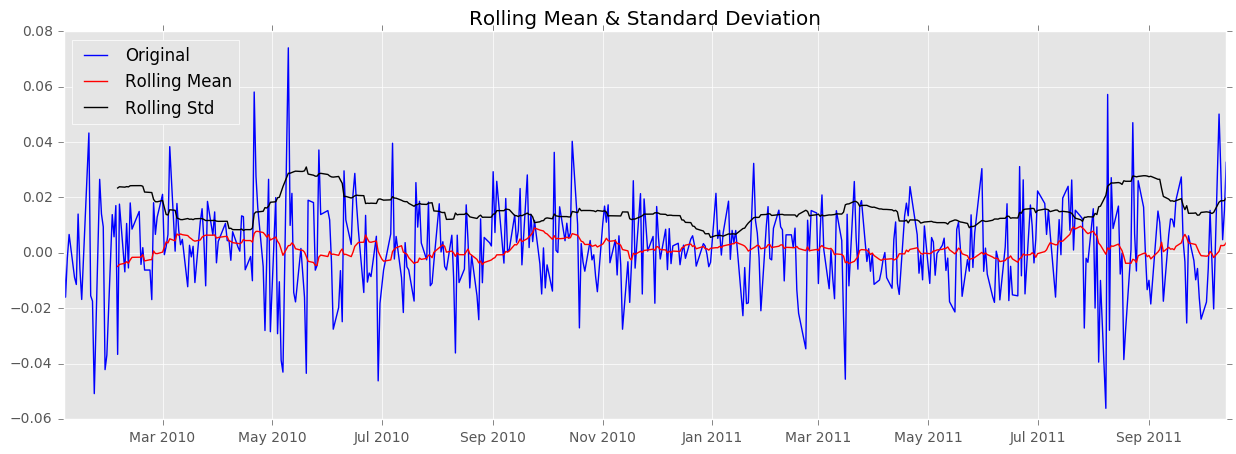

Results of Dickey-Fuller Test:
Test Statistic                -1.261665e+01
p-value                        1.611418e-23
#Lags Used                     2.000000e+00
Number of Observations Used    4.470000e+02
Critical Value (5%)           -2.868028e+00
Critical Value (1%)           -3.445064e+00
Critical Value (10%)          -2.570226e+00
dtype: float64


In [24]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_log_diff.dropna(inplace=True)
test_stationarity(Apple_log_diff)

 Stationary

#### Decomposing
In this technique, both trend and seasonality are modeled separately and the remaining part of the series is returned.

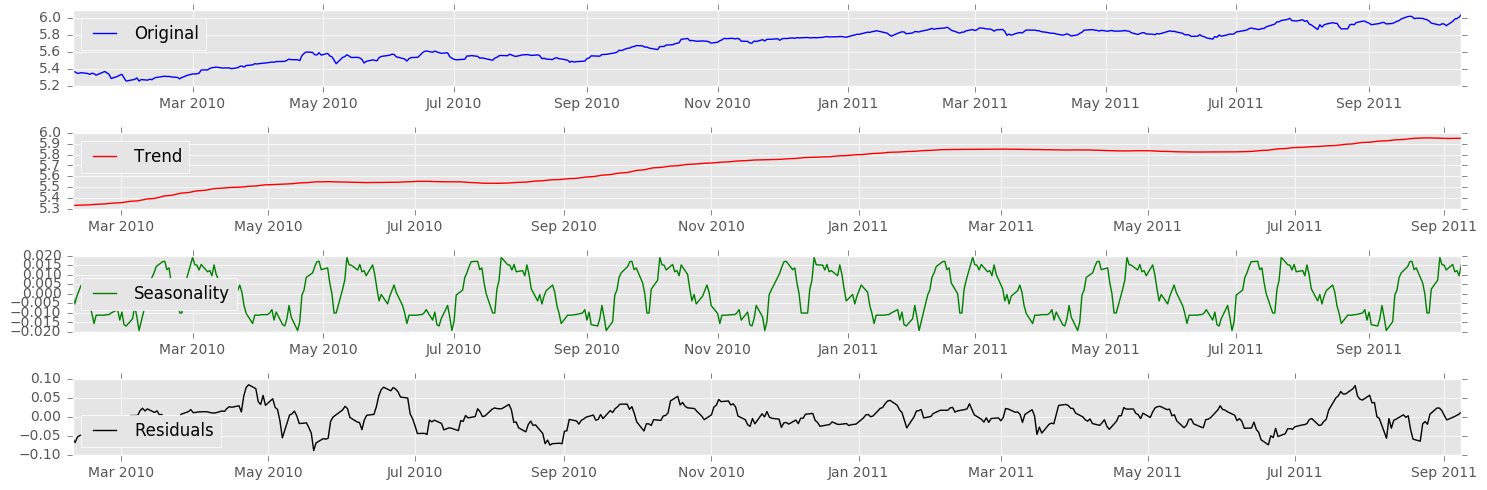

In [25]:
# Create a DataFrame with Series
df = pd.DataFrame(Apple_log)

# Get the time index from Series
idx = pd.DatetimeIndex(Apple_log.index)
df.set_index(idx, inplace=True)

# Resample using weekday frequency
df2 = df.resample('B').mean()

# Fill in missing values with interpolate
df2.AAPL.interpolate(inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df2.AAPL)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.subplot(411)
plt.plot(Apple_log, label='Original', color='b')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='r')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='g')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='k')
plt.legend(loc='best')
plt.tight_layout()


We now can run stationary test on the residuals

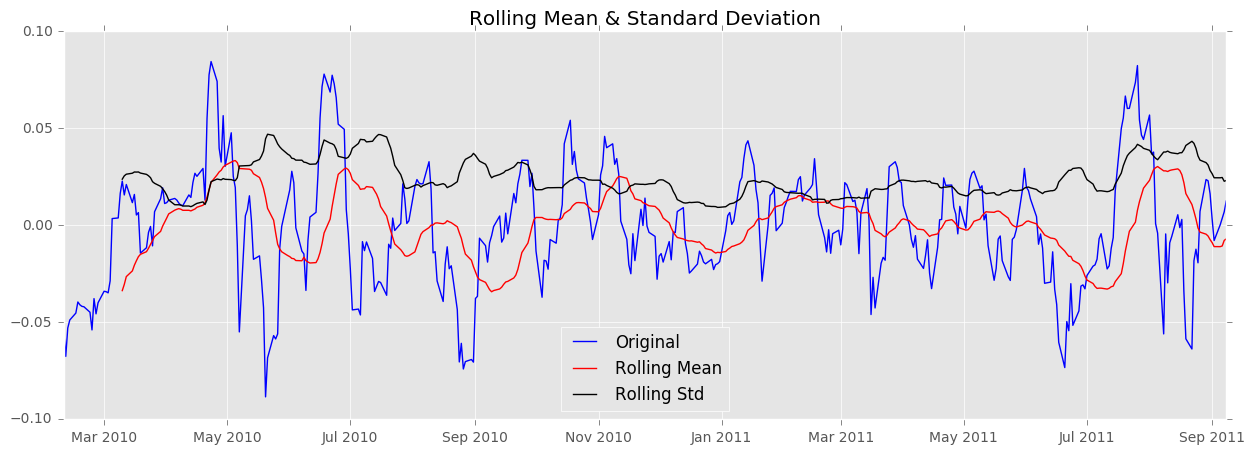

Results of Dickey-Fuller Test:
Test Statistic                -6.165669e+00
p-value                        7.000004e-08
#Lags Used                     2.000000e+00
Number of Observations Used    4.100000e+02
Critical Value (5%)           -2.868615e+00
Critical Value (1%)           -3.446401e+00
Critical Value (10%)          -2.570539e+00
dtype: float64


In [26]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
Apple_log_decompose = residual
Apple_log_decompose.dropna(inplace=True)
test_stationarity(Apple_log_decompose)

Data onvert to sationary condition

### ARIMA (Autoregressive Integrated Moving Average) 


The Autocorrelation Function (ACF) and Partial Autocorrelation Function(PACF) can be used to determine the value of AR and MA

In [27]:
from statsmodels.tsa.stattools import acf, pacf

In [28]:
# Show 10 days for the plot
lag_acf = acf(Apple_log_diff, nlags=15)
lag_pacf = pacf(Apple_log_diff, nlags=15)

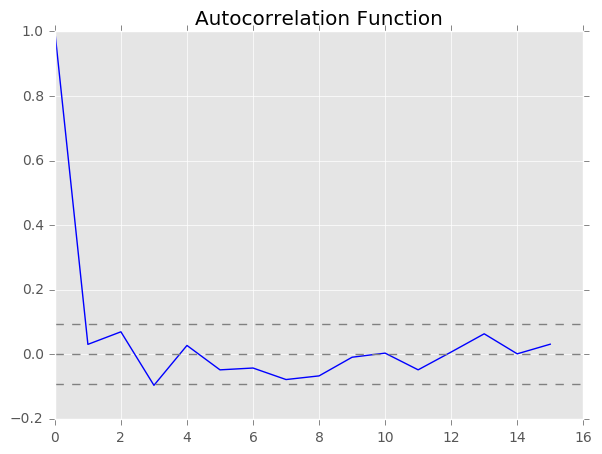

In [29]:
#Plot ACF:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.subplot(121) 
plt.plot(lag_acf, color='b')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Apple_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

The lag value of ACF is where it crosses the limits which is around day 1. 

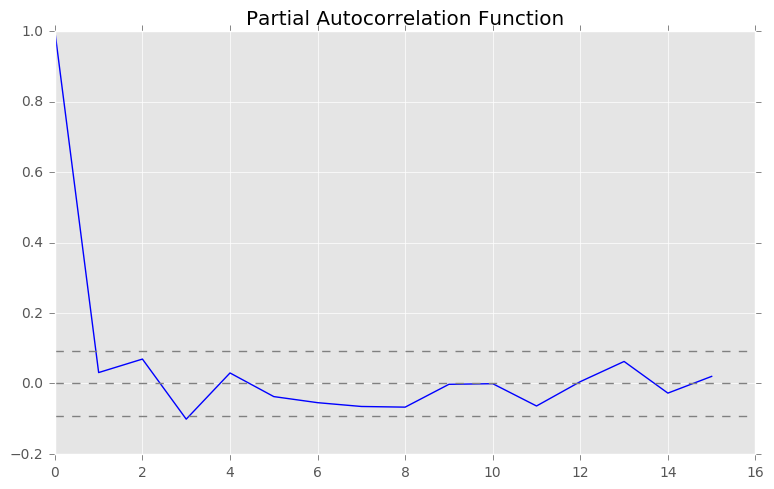

In [30]:
#Plot PACF:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.subplot(122)
plt.plot(lag_pacf, color='b')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Apple_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

For PACF, the lag value is also shown at around 1 day .  

##### AR Model

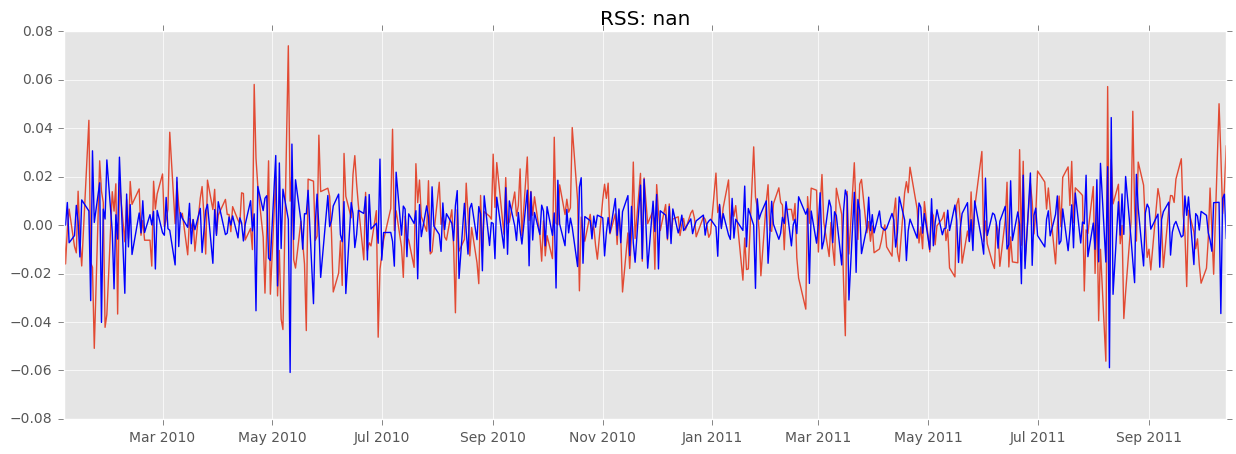

In [31]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
model = sm.tsa.ARIMA(Apple_log_diff, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(Apple_log_diff)
plt.plot(results_AR.fittedvalues, color='b')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-Apple_log_diff)**2))

In the above model, we passed tuple value of (1, 1, 0) to reflect ACF lag value of 1, differencing order of 1 and disregard PACF.

##### MA Model

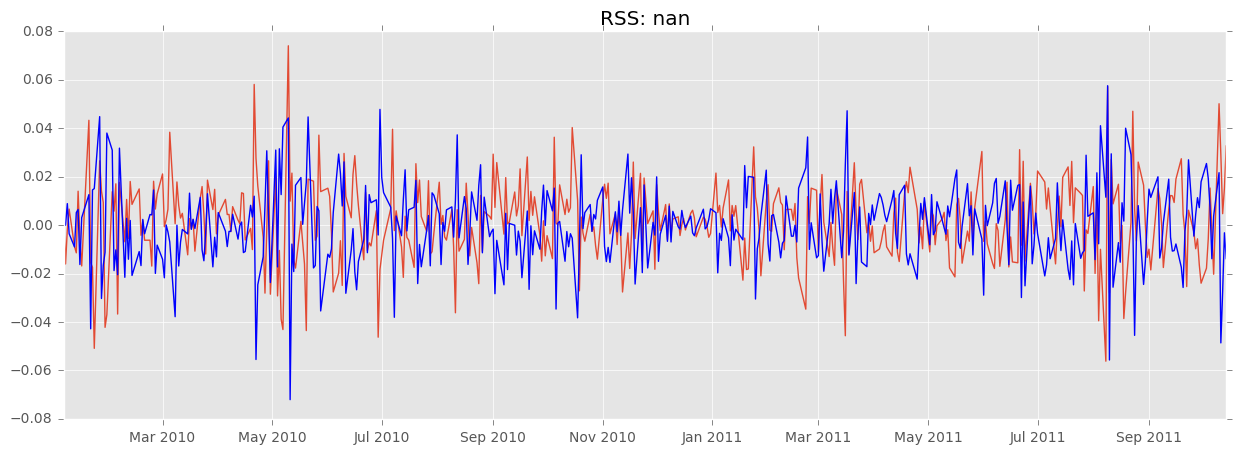

In [32]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
model = sm.tsa.ARIMA(Apple_log_diff, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(Apple_log_diff)
plt.plot(results_MA.fittedvalues, color='b')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-Apple_log_diff)**2))

In the MA model, we passed tuple value of (0, 1, 5) to reflect PACF lag value of 5, differencing order of 1 and disregard ACF.

##### ARIMA Model (Combination)

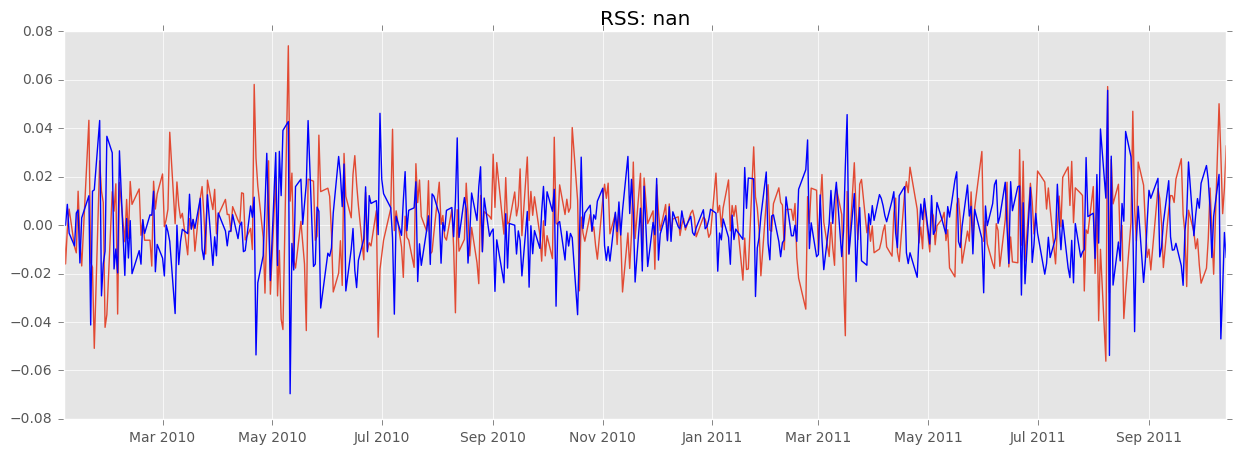

In [33]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
model = ARIMA(Apple_log_diff, order=(1, 1, 1))
results_ARIMA = model.fit(disp=-1)  
plt.plot(Apple_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='b')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-Apple_log_diff)**2))

First, we store the predicted result from ARIMA separately and observe it. 

In [34]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date
2010-01-06    8.228486e-07
2010-01-07    8.584672e-03
2010-01-08   -3.299239e-03
2010-01-11   -8.597407e-03
2010-01-12    5.012790e-03
dtype: float64


In [35]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date
2010-01-06    8.228486e-07
2010-01-07    8.585495e-03
2010-01-08    5.286256e-03
2010-01-11   -3.311150e-03
2010-01-12    1.701640e-03
dtype: float64


Next, we add to them to base log number.  

In [36]:
predictions_ARIMA_log = pd.Series(Apple_log.ix[0], index=Apple_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2010-01-04    5.366023
2010-01-05    5.366023
2010-01-06    5.366024
2010-01-07    5.374608
2010-01-08    5.371309
dtype: float64

Finally, we convert back the value from log by taking the exponenent.  We are also showing the comparison of the transformed TS data with the original values. 

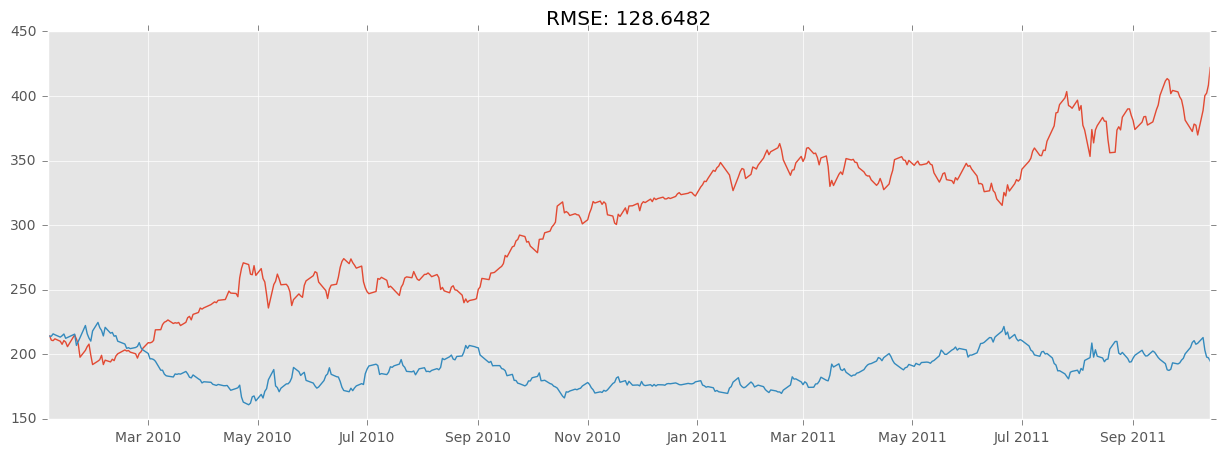

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.plot(Apple)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Apple)**2)/len(Apple)))

### Signal Frontier Analysis

In [ ]:
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [ ]:
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)
    daily_rets = prices.pct_change()
    # Compute portfolio returns
    port = port.shift(1).resample(freq).first()
    returns = daily_rets.resample(freq).apply(compound)
    port_rets = (port * returns).sum(axis=1)
    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [ ]:
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = pd.DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'